<a href="https://colab.research.google.com/github/fkaimphilat/python_course_materials/blob/master/HW_Final/HomeWork_4_Philatov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import time
import re
import seaborn
from lxml import html
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Получаем 250 самых топовых фильмов

In [2]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

Парсим страницу с фильмами и получаем грязные данные с


1.   Названием фильма
2.   Рейтингом
3.   Командой 
4.   Ссылкой на основную страницу




In [3]:
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]

In [4]:
data_frame = {
    "movies": movies,
    "ratings": ratings,
    "crew": crew,
    "links": links
}

data = pd.DataFrame(data_frame)
data

,movies,ratings,crew,links
0,"[\n 1.\n , [The Shawshank Redemption...",9.24000124528437,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.16100280377972,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.99390199674483,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/
3,"[\n 4.\n , [The Godfather: Part II],...",8.99012058976989,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.950781960978237,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/
...,...,...,...,...
245,"[\n 246.\n , [Beauty and the Beast],...",8.016654958761565,"Gary Trousdale (dir.), Paige O'Hara, Robby Benson",/title/tt0101414/
246,"[\n 247.\n , [Gandhi], \n, [(1982)],...",8.01526476606601,"Richard Attenborough (dir.), Ben Kingsley, Joh...",/title/tt0083987/
247,"[\n 248.\n , [The Help], \n, [(2011)...",8.014431247437928,"Tate Taylor (dir.), Emma Stone, Viola Davis",/title/tt1454029/
248,"[\n 249.\n , [The Handmaiden], \n, [...",8.01275741852934,"Park Chan-wook (dir.), Kim Min-hee, Ha Jung-woo",/title/tt4016934/


Несколько функциий для преобзразования грязных заголовков с названием фильмов


In [5]:
def process_text_mv(text):
    data = text.get_text().split("\n")
    return data[2].strip()

In [6]:
def process_text_year(text):
    data = text.get_text().split("\n")
    return data[3].strip()[1:-1]

In [7]:
data["title"] = data.movies.apply(process_text_mv)
data["year"] = data.movies.apply(process_text_year)

In [8]:
data.head()

,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [The Shawshank Redemption...",9.24000124528437,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.16100280377972,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.99390199674483,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008
3,"[\n 4.\n , [The Godfather: Part II],...",8.99012058976989,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather: Part II,1974
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.950781960978237,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957


*Задача* 1.
Получить список всех участников команд (убрать постфикс `(dir.)` у директоров). Найти количество уникальных имен.



In [233]:
def get_crews(dtf):

  #переменная может пригодится дальше, поэтому сделал глобальной
  global all_crews
  all_crews = list()

  for crews in dtf:
    crew = crews.split(',')
    for mmbr in crew:
      dirless = re.sub('^ | \(dir.\)', '', mmbr)
      if dirless not in all_crews:
        all_crews.append(dirless)

  print(all_crews[:10])
  print(len(all_crews))

get_crews(data.crew)

['Frank Darabont', 'Tim Robbins', 'Morgan Freeman', 'Francis Ford Coppola', 'Marlon Brando', 'Al Pacino', 'Christopher Nolan', 'Christian Bale', 'Heath Ledger', 'Robert De Niro']
526


Задача 2.
Получить список всех директоров. Построить распределение (визуализация обязательна) и найти директора(ов), у которого(ых) больше всего фильмов в топе.

In [230]:
#сначада получаем список всех директоров

def get_dirs(dtf):

  dirs_only = list()

  for crews1 in dtf:
    crew1 = crews1.split(',')
    for mmbr1 in crew1:
      if '(dir.)' in mmbr1:
        dirs_only.append(re.sub('^ | \(dir.\)', '', mmbr1))

  dirs_only = list(set(dirs_only))

  print(dirs_only)
  print(len(dirs_only))

get_dirs(data.crew)

['Buster Keaton', 'Paul Thomas Anderson', 'Denis Villeneuve', 'David Fincher', 'Frank Capra', 'Oliver Hirschbiegel', 'David Yates', 'Clyde Bruckman', 'Peter Farrelly', 'George Lucas', 'Terry Jones', 'Juan José Campanella', 'Elia Kazan', 'John G. Avildsen', 'Gore Verbinski', 'Andrew Stanton', 'Martin McDonagh', 'Michael Mann', 'Ingmar Bergman', 'Frank Darabont', 'George Miller', 'Jim Sheridan', 'M. Night Shyamalan', 'Olivier Nakache', 'Ernst Lubitsch', 'Dean DeBlois', 'Stuart Rosenberg', 'Kevin Costner', 'John Sturges', 'Elem Klimov', 'Billy Wilder', 'Michel Gondry', 'Ridley Scott', 'Masaki Kobayashi', 'Thomas Kail', 'Stanley Kubrick', 'Guy Ritchie', 'Nitesh Tiwari', 'Matt Reeves', 'Akira Kurosawa', 'Gus Van Sant', 'Guillermo del Toro', 'Asghar Farhadi', 'John Huston', 'Fritz Lang', 'Richard Attenborough', 'Tony Kaye', 'Victor Fleming', 'Sergio Pablos', 'Gary Trousdale', 'Adam Elliot', 'Sam Mendes', 'Wes Anderson', 'François Truffaut', 'Bryan Singer', 'Florian Zeller', 'Tate Taylor', 'B

In [231]:
#затем находи лучших

def bestdir(dtf, list_of_directors):
  # делаю эти переменные шлобальными, потому что они пригодятся дальше
  global dirsnmovies, filmsperdir
  dirsnmovies = {}
  filmsperdir = {}
  for director in list_of_directors:
    dirs_movies_list = list()
    dirs_movies_num = int()
    for i in range(len(dtf)):
      if '{} (dir.)'.format(director) in dtf.iloc[i][2]:
        dirs_movies_list.append(dtf.iloc[i][4])
        dirs_movies_num += 1
    dirsnmovies[director] = dirs_movies_list
    filmsperdir[director] = dirs_movies_num
  global the_most_movies
  the_most_movies = filmsperdir[max(filmsperdir, key=filmsperdir.get)]  
  print("The directors who have the most films in the list are")
  for tops in filmsperdir.items():
    if tops[1] == the_most_movies:
      print (tops[0])

bestdir(data, dirs_only)

The directors who have the most films in the list are
Stanley Kubrick
Akira Kurosawa
Martin Scorsese
Steven Spielberg
Christopher Nolan


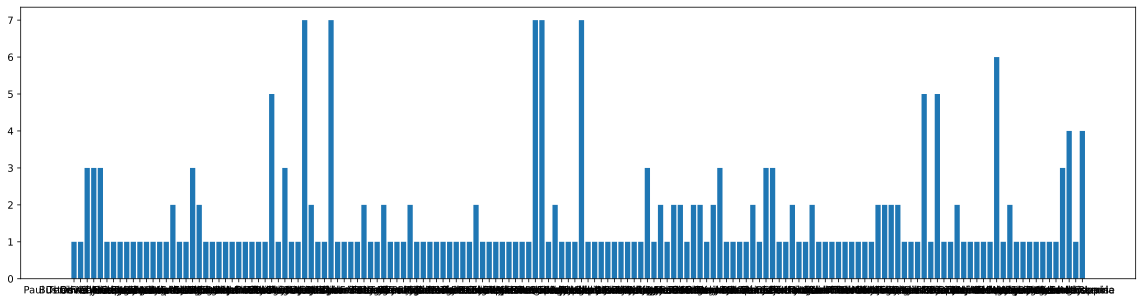

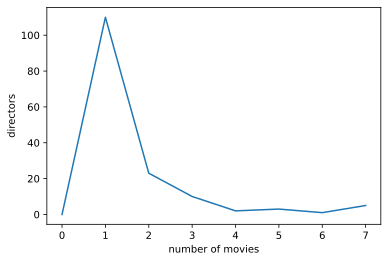

In [13]:
#постороил сразу два графика, потому что не понял до конца, что именно нужно

def dtom_figure(dictwdata):
  directors = list(dictwdata.keys())
  perdir = list(dictwdata.values())
  plt.figure(figsize=(20, 5))
  plt.bar(range(len(dictwdata)), perdir, tick_label=directors)
  plt.show()


def mtod_figure(dictwdata, hival):
  distribution_dict = {}
  for l in range(hival+1):
    distribution_dict[l] = 0
    for kolvo in dictwdata.values():
      if l == kolvo:
        distribution_dict[l] += 1
  plt.plot(list(distribution_dict.values()))
  plt.xlabel('number of movies')
  plt.ylabel('directors')
  plt.show()

#сколько фильмов в топе у каждого режиссера
dtom_figure(filmsperdir)
#сколько режиссеров имеют N фильмов в топе
mtod_figure(filmsperdir, the_most_movies)

Задача 3. Найти участника(ов) команд, у которого(ых) больше всего фильмов в топе.

In [14]:
def best_crew(dtf, members):
  crewdict = {}
  for person in members:
    crewdict[person] = 0
    for crews2 in dtf:
      if person in crews2:
        crewdict[person] += 1

  most_involved = crewdict[max(crewdict, key=crewdict.get)]  
  print("The member(s) of crews who has(-ve) the most films in the list is(are)")
  for tops1 in crewdict.items():
    if tops1[1] == most_involved:
      print (tops1[0], 'with {} movies'.format(tops1[1]))

best_crew(data.crew, all_crews)

The member(s) of crews who has(-ve) the most films in the list is(are)
Robert De Niro with 9 movies


Задача 4. Построить распределение топовых фильмов по годам

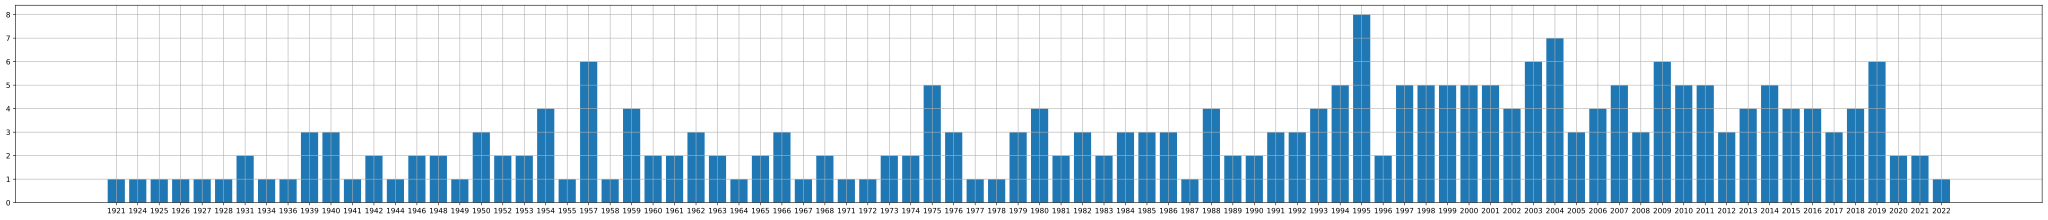

In [15]:
def bestyear(dtf):
  allyears = sorted(list(set(dtf)))
  years_dict = {}
  for year in allyears:
    years_dict[year] = 0
    for date in dtf:
      if date == year:
        years_dict[year] += 1

  plt.figure(figsize=(50, 5))
  plt.bar(range(len(years_dict)), list(years_dict.values()), tick_label=list(years_dict.keys()))
  plt.grid(True)
  plt.show()

bestyear(data.year)

Задача 5. Построить распределение топовых фильмов рейтингу:


*   Округлить до сотых и отрисовать
*   Округлить до десятых и отрисовать
*   Округлить до целых и отрисовать

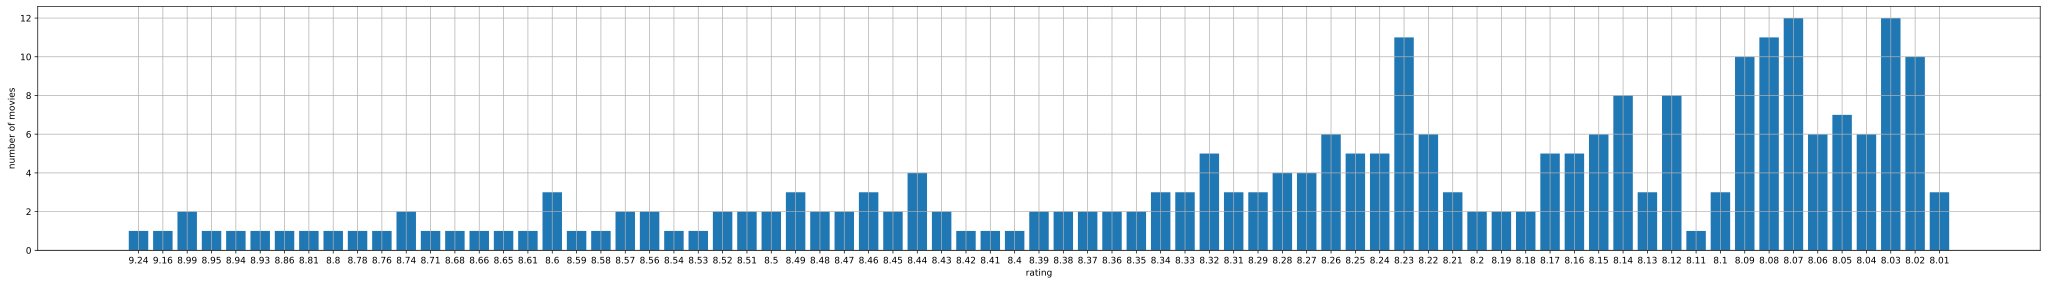

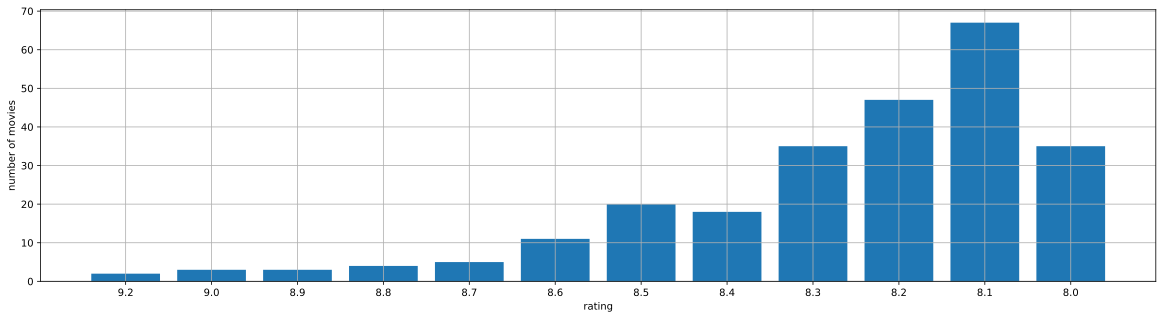

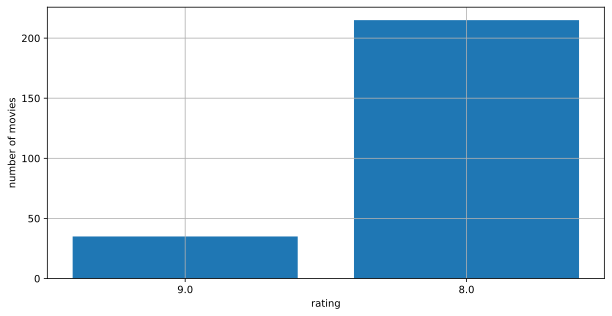

In [16]:
def ratedistribution(dtf, dcml):
  rates = {}
  for rating in dtf:
    rating = round(float(rating), dcml)
    if rating not in rates:
      rates[rating] = 1
    elif rating in rates:
      rates[rating] += 1

  #здесь я регулирую размер графика
  if dcml==0:
    width = 10
  else:
    width = dcml * 20

  plt.figure(figsize=(width, 5))
  plt.bar(range(len(rates)), list(rates.values()), tick_label=list(rates.keys()))
  plt.grid(True)
  plt.ylabel('number of movies')
  plt.xlabel('rating')
  plt.show()

#округление до сотых
ratedistribution(data.ratings, 2)
#округление до десятых
ratedistribution(data.ratings, 1)
#округление до цедых
ratedistribution(data.ratings, 0)

Задача 6. Используйте ссылку `http://www.imdb.com/` и динамически добавляя ссылку на фильм из колонки `links` соберите описание фильмов. Пример поиска необходимого текст представлен ниже. Добавьте эту информацию в исходный датафрейм.


In [18]:
def descr_add(dtf, links_col):
  descriptions = list()
  for link in links_col:
    film_url = 'http://www.imdb.com/{}'.format(link)
    html_text = requests.get(film_url).text
    soup = BeautifulSoup(html_text, 'lxml')
    description = soup.find_all(attrs={"name": "description"})[0].get("content")
    descriptions.append(description)
  dtf['description'] = descriptions

In [19]:
descr_add(data, data.links)
#data.drop(['description'], axis=1, inplace=True)
data

,movies,ratings,crew,links,title,year,description
0,"[\n 1.\n , [The Shawshank Redemption...",9.24000124528437,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,The Shawshank Redemption: Directed by Frank Da...
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.16100280377972,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,The Godfather: Directed by Francis Ford Coppol...
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.99390199674483,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,The Dark Knight: Directed by Christopher Nolan...
3,"[\n 4.\n , [The Godfather: Part II],...",8.99012058976989,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather: Part II,1974,The Godfather: Part II: Directed by Francis Fo...
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.950781960978237,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,12 Angry Men: Directed by Sidney Lumet. With M...
...,...,...,...,...,...,...,...
245,"[\n 246.\n , [Beauty and the Beast],...",8.016654958761565,"Gary Trousdale (dir.), Paige O'Hara, Robby Benson",/title/tt0101414/,Beauty and the Beast,1991,Beauty and the Beast: Directed by Gary Trousda...
246,"[\n 247.\n , [Gandhi], \n, [(1982)],...",8.01526476606601,"Richard Attenborough (dir.), Ben Kingsley, Joh...",/title/tt0083987/,Gandhi,1982,Gandhi: Directed by Richard Attenborough. With...
247,"[\n 248.\n , [The Help], \n, [(2011)...",8.014431247437928,"Tate Taylor (dir.), Emma Stone, Viola Davis",/title/tt1454029/,The Help,2011,The Help: Directed by Tate Taylor. With Emma S...
248,"[\n 249.\n , [The Handmaiden], \n, [...",8.01275741852934,"Park Chan-wook (dir.), Kim Min-hee, Ha Jung-woo",/title/tt4016934/,The Handmaiden,2016,The Handmaiden: Directed by Park Chan-wook. Wi...



Задача 7. С помощью регулярных выражений найдите в текстах описания фильмов имена актеров, если это возможно (то есть - они там упоминаются). Добавьте эту информацию в датафрейм и посчитайте, для скольких фильмов получилось это сдлеать. Подсказка: перечисление актеров иногда начинается с with. 

In [273]:
def find_actors(dtf, descriptions):

  actors = []

  for descr in descriptions:

    cast = []
    
    for found in re.findall('([A-Z][a-z]+,?\s+(?:[A-Z][a-z]*\.?\s*)?[A-Z][a-z]+)', descr):
    
      for crew_members in all_crews:
    
        if crew_members in found:
          cast.append(crew_members)
    
    actors.append(cast)

  dtf['actors'] = actors
  #dtf.drop(['actors'], axis=1, inplace=True)

find_actors(data, data.description)

In [275]:
data.head()

,movies,ratings,crew,links,title,year,description,actors
0,"[\n 1.\n , [The Shawshank Redemption...",9.24000124528437,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,The Shawshank Redemption: Directed by Frank Da...,"[Frank Darabont, Tim Robbins, Morgan Freeman]"
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.16100280377972,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,The Godfather: Directed by Francis Ford Coppol...,"[Francis Ford Coppola, Marlon Brando, Al Pacino]"
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.99390199674483,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,The Dark Knight: Directed by Christopher Nolan...,"[Christopher Nolan, Christian Bale, Heath Ledg..."
3,"[\n 4.\n , [The Godfather: Part II],...",8.99012058976989,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather: Part II,1974,The Godfather: Part II: Directed by Francis Fo...,"[Francis Ford Coppola, Al Pacino, Robert De Niro]"
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.950781960978237,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,12 Angry Men: Directed by Sidney Lumet. With M...,"[Sidney Lumet, Lee J. Cobb]"



Задача 8. Распарсите исходную страницу с топ-250 фильмов и получите для каждого фильмов количество оценок. Пример текста в исходной странице:`9.2 based on 2,554,919 user ratings`. Из этого текста нужно достать = `2,554,919`. Подсказка: используя метод `find_all` с аргументом `attrs` в который нужно передать `{'class': 'ratingColumn imdbRating'}` от страници `http://www.imdb.com/chart/top`. Найдите 10 фильмов (вывести их название и кол-во оценок) у которых, самое большое количество оценок.

In [23]:
def mostrated(souped, dtf, top):
  tags = (souped.find_all(attrs = {'class': 'ratingColumn imdbRating'}))

  usernum = list()

  for tag in tags:
    statement = tag.strong['title']
    number = int(re.findall(r'on ((\d+,)*\d{1,3})', statement)[0][0].replace(',',''))
    usernum.append(number)

  moviesnraters = pd.DataFrame(dtf)
  moviesnraters['based on [rating]'] = usernum

  print(moviesnraters.sort_values(by=['based on [rating]'], ascending=False)[:top])

mostrated(soup, data.title, 10)

                                                title  based on [rating]
0                            The Shawshank Redemption            2563879
2                                     The Dark Knight            2526108
12                                          Inception            2250548
11                                         Fight Club            2017550
10                                       Forrest Gump            1977809
7                                        Pulp Fiction            1968805
15                                         The Matrix            1846321
8   The Lord of the Rings: The Fellowship of the Ring            1786452
6       The Lord of the Rings: The Return of the King            1764671
1                                       The Godfather            1764637


Задача 9. Постройте топ 10 слов, которые встречаются 

1.   в названии фильмов
2.   в описании фильмов
3.   в названии и в описании фильмов


In [202]:
import string
from nltk.stem import WordNetLemmatizer
import operator #нужен для удобной работы со словарём

string.punctuation += '«»—…“”'
stops = stopwords.words('english')

In [219]:
def top_words(dtf, topshow = 10, size = (7,4)):

  all_words = {}
  for text in dtf:
    for word in text.split():
      lemma = lemmatizer.lemmatize(word).lower().strip(string.punctuation)
      if lemma not in stops:
        if lemma not in all_words:
          all_words[lemma] = 1
        else:
          all_words[lemma] += 1

  #достаю из словаря топ 10 слов
  topwords = dict(sorted(all_words.items(), key=operator.itemgetter(1), reverse=True)[:topshow])

  plt.figure(figsize=size)
  plt.bar(range(len(topwords)), list(topwords.values()), tick_label=list(topwords.keys()))
  plt.grid(True)
  plt.show()

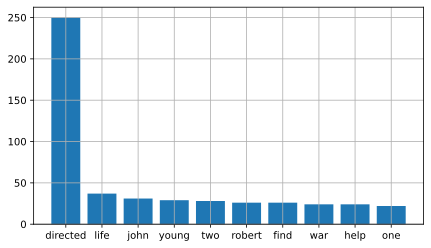

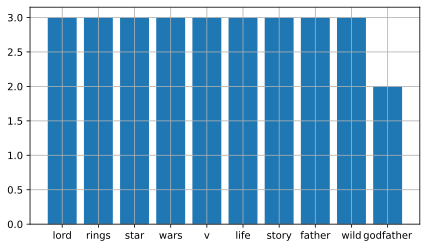

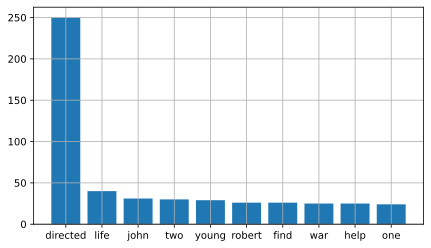

In [276]:
#топ слов в описаниях
top_words(data.description)
#топ слов в названиях
top_words(data.title)
#топ слов в описаниях и названиях
tnd = pd.concat([data.description, data.title])
top_words(tnd)


Задача 10*. Спарсить теги фильмов со страницы каждого фильма, так например для `The Godfather` ожидается получить список из `Crime, Drama`. (Можно увидеть эти теги по картинкой к фильму)


In [126]:
def getgenres(dtf):

  moviegenres = {}
  for link1 in dtf:

    film_url1 = 'http://www.imdb.com/{}'.format(link1)
    html_text1 = requests.get(film_url1).text
    soup1 = BeautifulSoup(html_text1, 'lxml')
    title1 = soup1("h1")[0].get_text()
    
    #из-за того, что у некоторых страниц (вроде для старых фильмов) нетипичка, возникала ошибка, которую пришлось решить, добавив альтернативный шаблон
    try:
      genres_extracted = soup1.find("div",  {"class":  "ipc-chip-list sc-14389611-4 ctpXmw", 'data-testid' : "genres" }).get_text()
    except AttributeError:
      genres_extracted = soup1.find("div",  {"class":  "ipc-chip-list sc-14389611-5 nYvah", 'data-testid' : "genres" }).get_text()
    
    #жанры достаются без пробелов, как CamelCase
    genres = re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', genres_extracted)
    
    #а слово SciFi само представлено в CamelCase, поэтому две части слова разделяются на разные строки. решил так:
    if 'Sci' in genres:
      genres.remove('Sci')
      genres.remove('Fi')
      genres.append('SciFi')
    
    #print(title1, genres)
    moviegenres[title1] = genres
  return moviegenres

In [127]:
getgenres(data.links)

{'12 Angry Men': ['Crime', 'Drama'],
 '12 Years a Slave': ['Biography', 'Drama', 'History'],
 '1917': ['Action', 'Drama', 'War'],
 '2001: A Space Odyssey': ['Adventure', 'SciFi'],
 '3 Idiots': ['Comedy', 'Drama'],
 'A Beautiful Mind': ['Biography', 'Drama'],
 'A Clockwork Orange': ['Crime', 'SciFi'],
 'A Separation': ['Drama'],
 'Aladdin': ['Animation', 'Adventure', 'Comedy'],
 'Alien': ['Horror', 'SciFi'],
 'Aliens': ['Action', 'Adventure', 'SciFi'],
 'All About Eve': ['Drama'],
 'Amadeus': ['Biography', 'Drama', 'Music'],
 'American Beauty': ['Drama'],
 'American History X': ['Drama'],
 'Amores perros': ['Drama', 'Thriller'],
 'Amélie': ['Comedy', 'Romance'],
 'Apocalypse Now': ['Drama', 'Mystery', 'War'],
 'Avengers: Endgame': ['Action', 'Adventure', 'Drama'],
 'Avengers: Infinity War': ['Action', 'Adventure', 'SciFi'],
 'Back to the Future': ['Adventure', 'Comedy', 'SciFi'],
 'Barry Lyndon': ['Adventure', 'Drama', 'History'],
 'Batman Begins': ['Action', 'Crime', 'Drama'],
 'Beauty

In [228]:
print(moviegenres)

{'The Shawshank Redemption': ['Drama'], 'The Godfather': ['Crime', 'Drama'], 'The Dark Knight': ['Action', 'Crime', 'Drama'], 'The Godfather: Part II': ['Crime', 'Drama'], '12 Angry Men': ['Crime', 'Drama'], "Schindler's List": ['Biography', 'Drama', 'History'], 'The Lord of the Rings: The Return of the King': ['Action', 'Adventure', 'Drama'], 'Pulp Fiction': ['Crime', 'Drama'], 'The Lord of the Rings: The Fellowship of the Ring': ['Action', 'Adventure', 'Drama'], 'The Good, the Bad and the Ugly': ['Adventure', 'Western']}
